# Fire Detection Model using YOLOv5

In [11]:
import os
import ultralytics
from roboflow import Roboflow
from dotenv import load_dotenv
from pathlib import Path

# Download the dataset if it hasnt been downloaded yet
if not os.path.exists('./Fire-Dataset-for-YOLOv8-10'):
    load_dotenv(Path('.env'))
    rf = Roboflow(api_key=os.getenv("ROBOFLOW_API_KEY"))
    project = rf.workspace("aj-garcia-736tc").project("fire-dataset-for-yolov8")
    version = project.version(10)
    dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Dataset-for-YOLOv8-10 in yolov8:: 100%|██████████| 8001/8001 [00:00<00:00, 10185.20it/s]


In [3]:
train_path = Path("./Fire-Dataset-for-YOLOv8-10/train/images")
train_size = len(os.listdir(train_path))

val_path = Path("./Fire-Dataset-for-YOLOv8-10/valid/images")
val_size = len(os.listdir(val_path))

print(f"Train images size: {train_size}, Val images size: {val_size}")

Train images size: 3196, Val images size: 800


Text(0, 0.5, 'Percentage (%)')

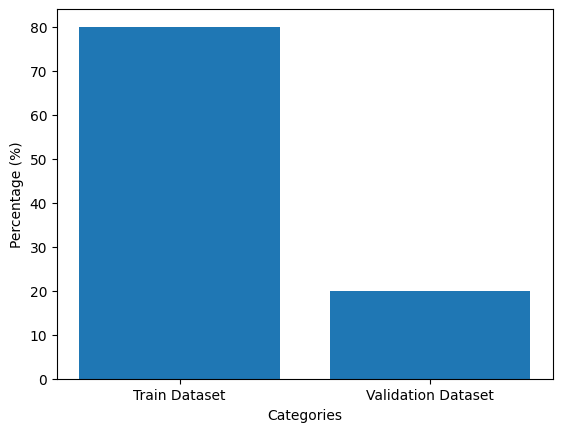

In [4]:
import matplotlib.pyplot as plt
import numpy as np

names = ["Train Dataset", "Validation Dataset"]
values = [train_size, val_size]

# Visualize the percentage of the distributed datasets
plt.bar(names, np.array(values) * 100/sum(values))
plt.xlabel("Categories")
plt.ylabel("Percentage (%)")

In [12]:
%cd ~/Documents/Projects/UNI544-SymbIoT-Prototype

/home/adhy/Documents/Projects/UNI544-SymbIoT-Prototype


This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


In [32]:
!yolo task=detect mode=train model=Models/yolov8n.pt data=Fire-Dataset-for-YOLOv8-10/data.yaml lrf=0.0001 epochs=50 imgsz=416 plots=True

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.3.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3806MiB)
engine/trainer: task=detect, mode=train, model=Models/yolov8n.pt, data=Fire-Dataset-for-YOLOv8-10/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, 

In [34]:
from ultralytics import YOLO
model = YOLO('./runs/detect/train14/weights/best.pt')

model.export(format='onnx')

Ultralytics 8.3.91 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train14/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 5, 3549) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 1.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 24.9s, installed 3 packages: ['onnx>=1.12.0

'runs/detect/train14/weights/best.onnx'